#Завдання:

###Завдання 1

Візуалізуй функцію на відрізку від 0 до 24. За допомогою SymPy порахуй невизначений інтеграл функції та інтеграл від a до b.



###Завдання 2

Напиши функцію чисельного інтегрування методом прямокутників та порахуй інтеграл від a до b.



###Завдання 3

Напиши функцію чисельного інтегрування методом трапецій та порахуй інтеграл від a до b.



###Завдання 4

Напиши функцію чисельного інтегрування методом Сімпсона та порахуй інтеграл від a до b.



###Завдання 5

Порахуй інтеграл від a до b за допомогою функції scipy.integrate.quad.

#Код приведенний нижче розв'язує всі 5 завдань

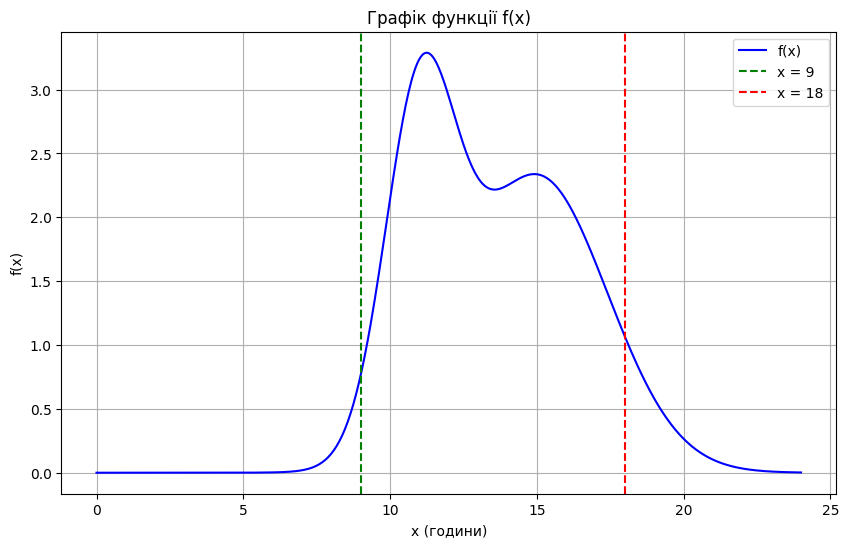

Невизначений інтеграл:
4.94974746830583*sqrt(2)*erf(0.294627825494395*x - 4.41941738241592) + 2.82842712474619*sqrt(2)*erf(0.58925565098879*x - 6.48181216087669)
Визначений інтеграл від 9 до 18: 20.0516450141883
Інтеграл методом прямокутників (середня кількість тасок, виконаних у продовж дня): 20.050284225265795
Інтеграл методом трапецій (середня кількість тасок, виконаних у продовж дня): 20.051634332194162
Інтеграл методом Сімпсона (середня кількість тасок, виконаних у продовж дня): 20.051645014196342
Інтеграл за допомогою scipy.integrate.quad (середня кількість тасок, виконаних у продовж дня): 20.051645014188306


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, exp, pi, sqrt, integrate, lambdify
from scipy.integrate import quad

#Опис функції
x = symbols('x')
f = 2 * (
    (4 / (1.2 * sqrt(2 * pi))) * exp(-0.5 * ((x - 11) / 1.2) ** 2) +
    (7 / (2.4 * sqrt(2 * pi))) * exp(-0.5 * ((x - 15) / 2.4) ** 2)
)

#Межі інтегрування
a, b = 9, 18

#Завдання 1: Побудова графіка функції
x_vals = np.linspace(0, 24, 500)
f_func = lambdify(x, f, "numpy")
y_vals = f_func(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x)", color='blue')
plt.axvline(a, color='green', linestyle='--', label=f"x = {a}")
plt.axvline(b, color='red', linestyle='--', label=f"x = {b}")
plt.title("Графік функції f(x)")
plt.xlabel("x (години)")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

#Дялі буде розрахована середня кількість тасок, виконаних у продовж дня за допомогою: SymPy, Метода прямокутників, Метода трапецій, Метода Сімпсона, Інтегрування за допомогою scipy.integrate.quad

#Завдання 1: Невизначений та визначений інтеграли за допомогою SymPy
indef_integral = integrate(f, x)
def_integral = integrate(f, (x, a, b))
print("Невизначений інтеграл:")
print(indef_integral)
print(f"Визначений інтеграл від {a} до {b}: {def_integral.evalf()}")

#Завдання 2: Метод прямокутників
def rectangle_method(func, a, b, n=1000):
    h = (b - a) / n
    x_vals = np.linspace(a, b - h, n)
    return h * np.sum(func(x_vals))

rect_integral = rectangle_method(f_func, a, b)
print(f"Інтеграл методом прямокутників: {rect_integral}")

#Завдання 3: Метод трапецій
def trapezoidal_method(func, a, b, n=1000):
    h = (b - a) / n
    x_vals = np.linspace(a, b, n + 1)
    y_vals = func(x_vals)
    return h * (np.sum(y_vals) - 0.5 * (y_vals[0] + y_vals[-1]))

trap_integral = trapezoidal_method(f_func, a, b)
print(f"Інтеграл методом трапецій: {trap_integral}")

#Завдання 4: Метод Сімпсона
def simpson_method(func, a, b, n=1000):
    if n % 2 == 1:
        n += 1
    h = (b - a) / n
    x_vals = np.linspace(a, b, n + 1)
    y_vals = func(x_vals)
    return h / 3 * (y_vals[0] + y_vals[-1] + 4 * np.sum(y_vals[1:-1:2]) + 2 * np.sum(y_vals[2:-2:2]))

simp_integral = simpson_method(f_func, a, b)
print(f"Інтеграл методом Сімпсона: {simp_integral}")

#Завдання 5: Інтегрування за допомогою scipy.integrate.quad
scipy_integral, scipy_error = quad(f_func, a, b)
print(f"Інтеграл за допомогою scipy.integrate.quad: {scipy_integral}")